# Lotka-Volterra Predator-Prey Simulation

## Theoretical Foundation

The **Lotka-Volterra equations**, also known as the predator-prey equations, are a pair of first-order nonlinear differential equations that describe the dynamics of biological systems in which two species interact: one as a predator and one as prey. These equations were independently developed by Alfred J. Lotka (1925) and Vito Volterra (1926).

### Mathematical Formulation

Let $x(t)$ denote the prey population and $y(t)$ denote the predator population at time $t$. The classical Lotka-Volterra system is given by:

$$\frac{dx}{dt} = \alpha x - \beta xy$$

$$\frac{dy}{dt} = \delta xy - \gamma y$$

where the parameters have the following ecological interpretations:

| Parameter | Symbol | Description |
|-----------|--------|-------------|
| Prey birth rate | $\alpha$ | Natural growth rate of prey in absence of predation |
| Predation rate | $\beta$ | Rate at which predators consume prey |
| Predator reproduction | $\delta$ | Rate at which predators increase by consuming prey |
| Predator death rate | $\gamma$ | Natural death rate of predators in absence of prey |

### Equilibrium Analysis

The system has two equilibrium points:

1. **Trivial equilibrium**: $(x^*, y^*) = (0, 0)$ — extinction of both species

2. **Coexistence equilibrium**: $(x^*, y^*) = \left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$

### Conservation Law

The Lotka-Volterra system possesses a conserved quantity (first integral):

$$V(x, y) = \delta x - \gamma \ln(x) + \beta y - \alpha \ln(y) = C$$

This conservation law implies that trajectories in phase space form closed orbits around the coexistence equilibrium, corresponding to periodic oscillations in both populations.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set up matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 11

## Model Implementation

We define the Lotka-Volterra system as a Python function compatible with `scipy.integrate.odeint`.

In [2]:
def lotka_volterra(state, t, alpha, beta, delta, gamma):
    """
    Lotka-Volterra predator-prey differential equations.
    
    Parameters
    ----------
    state : array_like
        Current state [prey, predator]
    t : float
        Current time (not used explicitly, but required by odeint)
    alpha : float
        Prey birth rate
    beta : float
        Predation rate coefficient
    delta : float
        Predator reproduction rate
    gamma : float
        Predator death rate
    
    Returns
    -------
    derivatives : list
        [dx/dt, dy/dt]
    """
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

## Parameter Configuration

We select biologically plausible parameters that produce clear oscillatory dynamics.

In [3]:
# Model parameters
alpha = 1.0    # Prey birth rate
beta = 0.1     # Predation rate
delta = 0.075  # Predator reproduction rate
gamma = 1.5    # Predator death rate

# Initial conditions
x0 = 10  # Initial prey population
y0 = 5   # Initial predator population
initial_state = [x0, y0]

# Time span for simulation
t_max = 50
t = np.linspace(0, t_max, 2000)

# Calculate equilibrium point
x_eq = gamma / delta
y_eq = alpha / beta

print(f"Model Parameters:")
print(f"  α (prey birth rate) = {alpha}")
print(f"  β (predation rate) = {beta}")
print(f"  δ (predator reproduction) = {delta}")
print(f"  γ (predator death rate) = {gamma}")
print(f"\nInitial Conditions:")
print(f"  Prey: {x0}, Predator: {y0}")
print(f"\nEquilibrium Point:")
print(f"  x* = γ/δ = {x_eq:.2f}")
print(f"  y* = α/β = {y_eq:.2f}")

Model Parameters:
  α (prey birth rate) = 1.0
  β (predation rate) = 0.1
  δ (predator reproduction) = 0.075
  γ (predator death rate) = 1.5

Initial Conditions:
  Prey: 10, Predator: 5

Equilibrium Point:
  x* = γ/δ = 20.00
  y* = α/β = 10.00


## Numerical Integration

We solve the system using the LSODA algorithm implemented in `scipy.integrate.odeint`.

In [4]:
# Solve the ODE system
solution = odeint(lotka_volterra, initial_state, t, args=(alpha, beta, delta, gamma))

# Extract prey and predator populations
prey = solution[:, 0]
predator = solution[:, 1]

print(f"Simulation completed: {len(t)} time points")
print(f"Prey population range: [{prey.min():.2f}, {prey.max():.2f}]")
print(f"Predator population range: [{predator.min():.2f}, {predator.max():.2f}]")

Simulation completed: 2000 time points
Prey population range: [7.93, 40.60]
Predator population range: [3.09, 23.28]


## Visualization

We create a comprehensive visualization with four panels:
1. Population dynamics over time
2. Phase portrait with trajectory
3. Direction field with nullclines
4. Conservation law verification

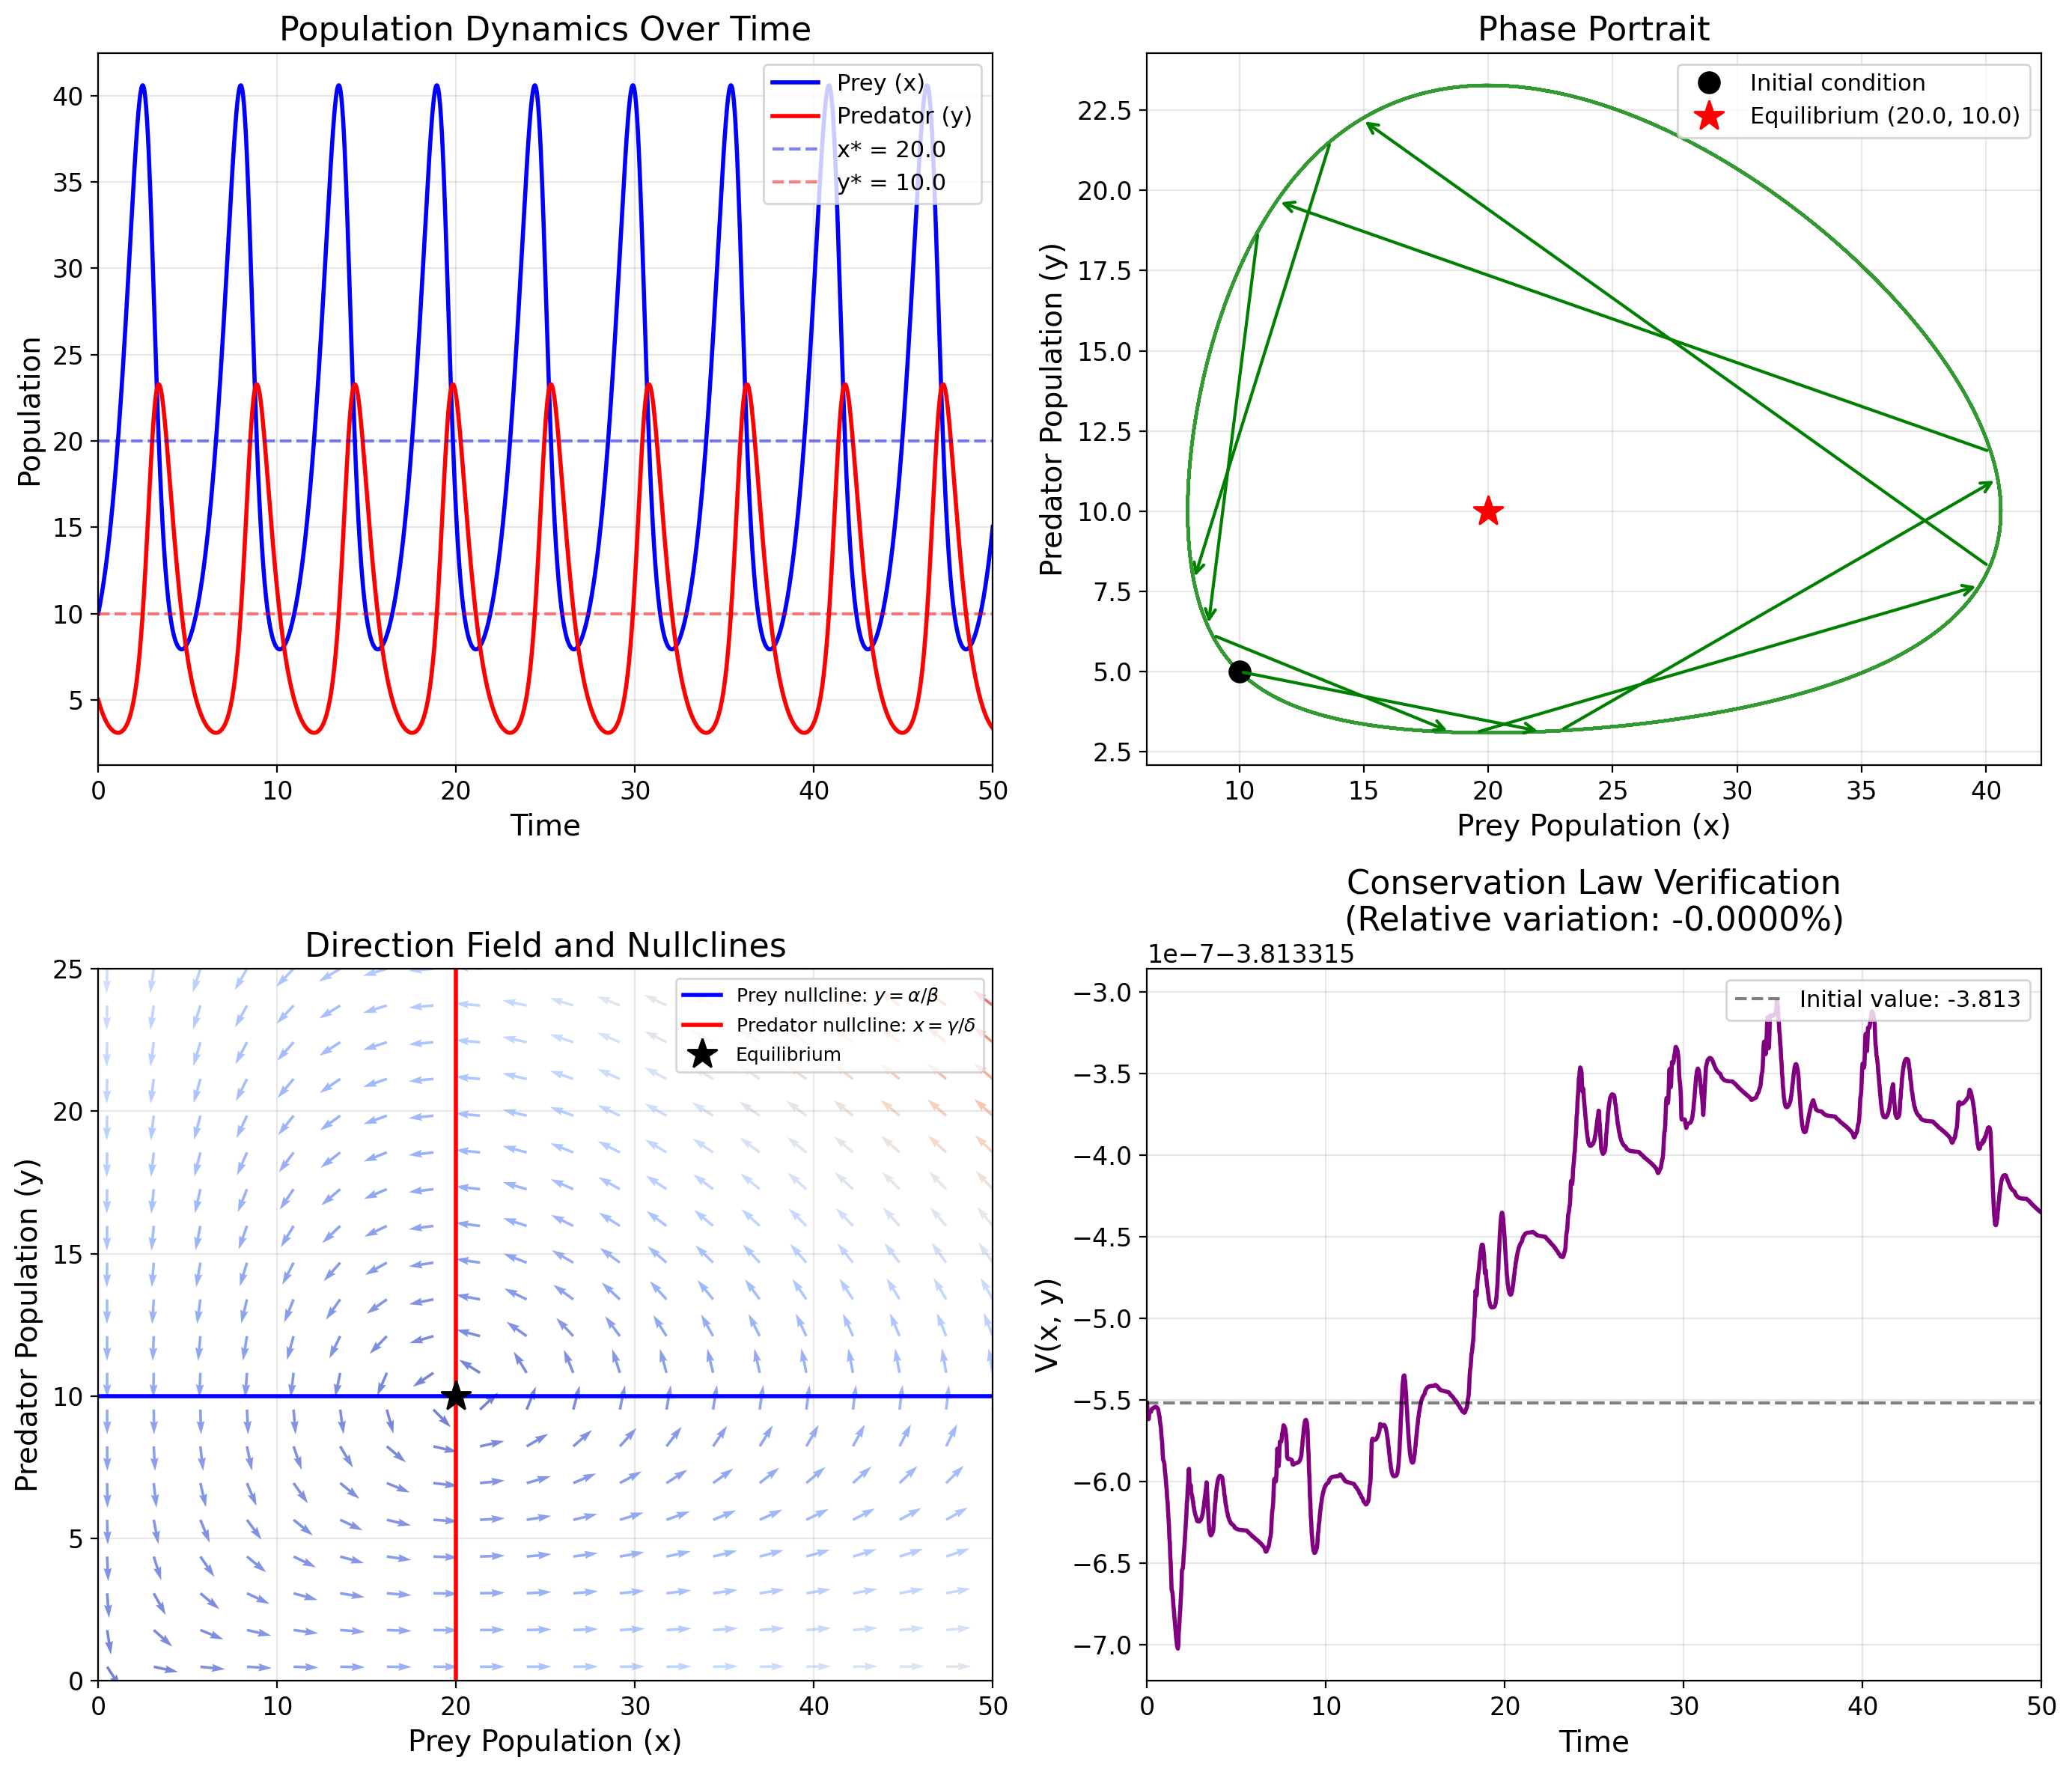


Figure saved to 'plot.png'


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Panel 1: Time series
ax1 = axes[0, 0]
ax1.plot(t, prey, 'b-', linewidth=2, label=f'Prey (x)')
ax1.plot(t, predator, 'r-', linewidth=2, label=f'Predator (y)')
ax1.axhline(y=x_eq, color='b', linestyle='--', alpha=0.5, label=f'x* = {x_eq:.1f}')
ax1.axhline(y=y_eq, color='r', linestyle='--', alpha=0.5, label=f'y* = {y_eq:.1f}')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('Population Dynamics Over Time')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, t_max])

# Panel 2: Phase portrait
ax2 = axes[0, 1]
ax2.plot(prey, predator, 'g-', linewidth=1.5, alpha=0.8)
ax2.plot(prey[0], predator[0], 'ko', markersize=10, label='Initial condition')
ax2.plot(x_eq, y_eq, 'r*', markersize=15, label=f'Equilibrium ({x_eq:.1f}, {y_eq:.1f})')

# Add direction arrows along trajectory
arrow_indices = np.linspace(0, len(t)-100, 8, dtype=int)
for i in arrow_indices:
    ax2.annotate('', xy=(prey[i+50], predator[i+50]), xytext=(prey[i], predator[i]),
                arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

ax2.set_xlabel('Prey Population (x)')
ax2.set_ylabel('Predator Population (y)')
ax2.set_title('Phase Portrait')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Panel 3: Vector field with nullclines
ax3 = axes[1, 0]

# Create meshgrid for vector field
x_range = np.linspace(0.5, 50, 20)
y_range = np.linspace(0.5, 25, 20)
X, Y = np.meshgrid(x_range, y_range)

# Calculate derivatives at each point
DX = alpha * X - beta * X * Y
DY = delta * X * Y - gamma * Y

# Normalize for better visualization
M = np.sqrt(DX**2 + DY**2)
M[M == 0] = 1  # Avoid division by zero
DX_norm = DX / M
DY_norm = DY / M

# Plot vector field
ax3.quiver(X, Y, DX_norm, DY_norm, M, cmap='coolwarm', alpha=0.7)

# Plot nullclines
x_null = np.linspace(0.1, 50, 100)
# Prey nullcline: dx/dt = 0 => y = α/β
ax3.axhline(y=alpha/beta, color='blue', linestyle='-', linewidth=2, 
           label=r'Prey nullcline: $y = \alpha/\beta$')
# Predator nullcline: dy/dt = 0 => x = γ/δ
ax3.axvline(x=gamma/delta, color='red', linestyle='-', linewidth=2,
           label=r'Predator nullcline: $x = \gamma/\delta$')

# Plot equilibrium
ax3.plot(x_eq, y_eq, 'k*', markersize=15, label='Equilibrium')

ax3.set_xlabel('Prey Population (x)')
ax3.set_ylabel('Predator Population (y)')
ax3.set_title('Direction Field and Nullclines')
ax3.legend(loc='upper right', fontsize=9)
ax3.set_xlim([0, 50])
ax3.set_ylim([0, 25])
ax3.grid(True, alpha=0.3)

# Panel 4: Conservation law
ax4 = axes[1, 1]

# Calculate the conserved quantity V(x,y)
V = delta * prey - gamma * np.log(prey) + beta * predator - alpha * np.log(predator)

ax4.plot(t, V, 'purple', linewidth=2)
ax4.axhline(y=V[0], color='k', linestyle='--', alpha=0.5, 
           label=f'Initial value: {V[0]:.3f}')

# Calculate and display conservation error
conservation_error = np.std(V) / np.mean(V) * 100
ax4.set_xlabel('Time')
ax4.set_ylabel('V(x, y)')
ax4.set_title(f'Conservation Law Verification\n(Relative variation: {conservation_error:.4f}%)')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, t_max])

plt.tight_layout()
plt.savefig('lotka_volterra_predator_prey_simulation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to 'plot.png'")

## Analysis and Discussion

### Key Observations

1. **Periodic Oscillations**: Both populations exhibit sustained oscillations with a characteristic period. The prey population peaks before the predator population, reflecting the time lag in predator response.

2. **Phase Relationship**: The phase portrait shows closed orbits, confirming the conservative nature of the system. Trajectories neither spiral inward (stable focus) nor outward (unstable focus).

3. **Nullcline Analysis**: 
   - When $y < \alpha/\beta$: prey population increases
   - When $x < \gamma/\delta$: predator population decreases
   - The intersection defines the unique coexistence equilibrium

4. **Conservation Verification**: The first integral $V(x,y)$ remains nearly constant throughout the simulation, with only minor numerical drift, validating both the mathematical theory and numerical accuracy.

### Ecological Implications

The model predicts:
- Neither species goes extinct in isolation
- Predator-prey cycles are self-sustaining
- Population extremes can be significantly larger than equilibrium values

### Model Limitations

The classical Lotka-Volterra model makes several simplifying assumptions:
- Unlimited prey growth capacity (no carrying capacity)
- Linear functional response (Type I)
- No spatial structure or migration
- Deterministic dynamics (no stochasticity)

Extensions such as the Rosenzweig-MacArthur model address some of these limitations by incorporating logistic prey growth and saturating functional responses.